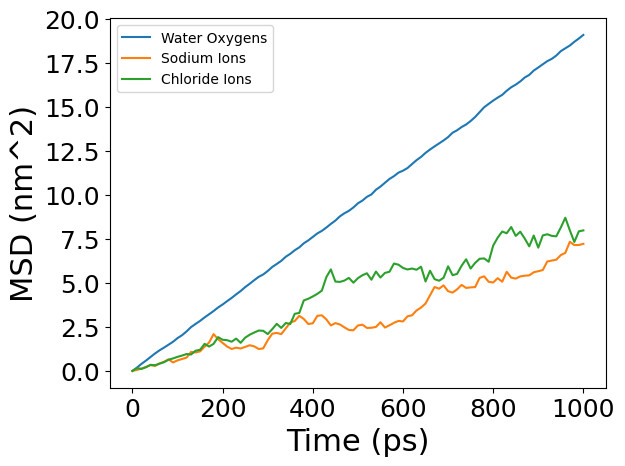

In [17]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load trajectory and topology
traj = md.load('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week4-CharmmGuiSetup/Setup/NaCl_H2O/gromacs/unwrapped_traj.xtc', top='/home/yl12451/comp-lab-class/comp-lab-class-2024/Week4-CharmmGuiSetup/Setup/NaCl_H2O/gromacs/step3_input.gro')
# Select atom indices for different groups
oxygen_indices = traj.topology.select('name O')  # Water oxygens
sodium_indices = traj.topology.select('name SOD')  # Sodium ions
chloride_indices = traj.topology.select('name CLA')  # Chloride ions

# Calculate MSD for each group
def compute_msd(traj, atom_indices):
    n_frames = traj.n_frames
    msd = np.zeros(n_frames)
    
    # Compute MSD for each frame
    for t0 in range(n_frames):
        disp = traj.xyz[t0:, atom_indices] - traj.xyz[t0, atom_indices]
        disp_squared = np.sum(disp ** 2, axis=2)  # Square displacement
        msd[t0:] += np.mean(disp_squared, axis=1)
    
    return msd / np.arange(1, n_frames + 1)

# Compute MSD for water oxygens, sodium, and chloride
msd_oxygen = compute_msd(traj, oxygen_indices)
msd_sodium = compute_msd(traj, sodium_indices)
msd_chloride = compute_msd(traj, chloride_indices)
# Assume time step is 2 fs and frame interval is 100
time_step_fs = 2  # Time step in femtoseconds (fs)
frame_interval = 5000  # Frames saved every 100 steps
time_per_frame_ps = (time_step_fs * frame_interval) / 1000  # Convert to picoseconds (ps)

# Generate time array for the x-axis (in ps)
time_ps = np.arange(traj.n_frames) * time_per_frame_ps

# Plot MSD with time in ps on the x-axis
plt.figure()
plt.plot(time_ps, msd_oxygen, label='Water Oxygens')
plt.plot(time_ps, msd_sodium, label='Sodium Ions')
plt.plot(time_ps, msd_chloride, label='Chloride Ions')

plt.xlabel('Time (ps)', fontsize=22)  # Change to picoseconds (ps)
plt.ylabel('MSD (nm^2)', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.savefig('Figures/MSD.png')
plt.show()
